<div class="alert block-alert alert-success">
    <h1>Course work - Statistics</h1><span class="tocSkip">
</div>

## Условие проекта<span class="tocSkip">

В компании SkyCrossroads есть рекламная акция, в соответствии с которой клиенту дается возможность получить дополнительные баллы лояльности за покупку, совершенную в течение ограниченного периода времени после запуска акции. 

Классическая акция подразумевает получение дополнительные 1000 баллов лояльности за покупку от 100 рублей. Было решено запустить АБ Тест, в котором в тестовой группе предлагается в два раза больше баллов лояльности за покупку от 100 рублей. 

Эксперимент был проведен в нескольких торговых точках, которые в датасете представлены столбцом id_point. Также в датасете есть информация о том, как долго клиент зарегистрирован у нас в программе лояльности.

Отдел маркетинга попросил вас рассчитать результаты этого эксперимента (в целом и в отдельности по каждой точке) и вынести решение об эффективности воздействия Б по сравнению с воздействием А. Также они хотят получить сегментацию пользователей с точки зрения их
длительности регистрации.

<h1>Этапы работы над проектом<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общий-анализ-AB--теста" data-toc-modified-id="Общий-анализ-AB--теста-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общий анализ AB- теста</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных" data-toc-modified-id="Импорт-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт данных</a></span></li><li><span><a href="#Очистка-данных-от-нуллов-и-выбросов" data-toc-modified-id="Очистка-данных-от-нуллов-и-выбросов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Очистка данных от нуллов и выбросов</a></span></li><li><span><a href="#Сравнения-выборок-в-A-и-B-группе" data-toc-modified-id="Сравнения-выборок-в-A-и-B-группе-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Сравнения выборок в A и B группе</a></span></li><li><span><a href="#Результаты-параметрического-и-непараметрического-тестов" data-toc-modified-id="Результаты-параметрического-и-непараметрического-тестов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Результаты параметрического и непараметрического тестов</a></span><ul class="toc-item"><li><span><a href="#Проверка-нулевой-гипотезы-о-равенстве-распределений-двух-выборок." data-toc-modified-id="Проверка-нулевой-гипотезы-о-равенстве-распределений-двух-выборок.-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Проверка нулевой гипотезы о равенстве распределений двух выборок.</a></span></li><li><span><a href="#Проверка-нулевой-гипотезы-о-равенстве-средних-двух-выборок" data-toc-modified-id="Проверка-нулевой-гипотезы-о-равенстве-средних-двух-выборок-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Проверка нулевой гипотезы о равенстве средних двух выборок</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-по-торговым-точкам" data-toc-modified-id="Анализ-по-торговым-точкам-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ по торговым точкам</a></span><ul class="toc-item"><li><span><a href="#Визуализация-результатов-в-A-и-B-группе-по-каждой-торговой-точке" data-toc-modified-id="Визуализация-результатов-в-A-и-B-группе-по-каждой-торговой-точке-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация результатов в A и B группе по каждой торговой точке</a></span></li><li><span><a href="#Результаты-параметрического-и-непараметрического-тестов-по-каждой-торговой-точке" data-toc-modified-id="Результаты-параметрического-и-непараметрического-тестов-по-каждой-торговой-точке-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Результаты параметрического и непараметрического тестов по каждой торговой точке</a></span></li></ul></li><li><span><a href="#Исследование-распределения-клиентов-по-сегментам" data-toc-modified-id="Исследование-распределения-клиентов-по-сегментам-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование распределения клиентов по сегментам</a></span></li><li><span><a href="#Корреляция-между-выплаченной-суммой-и-длительностью-регистрации" data-toc-modified-id="Корреляция-между-выплаченной-суммой-и-длительностью-регистрации-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Корреляция между выплаченной суммой и длительностью регистрации</a></span></li><li><span><a href="#Бизнес-рекомендации" data-toc-modified-id="Бизнес-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Бизнес-рекомендации</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics as st
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
sns.set() # устанавливаю тему Seaborn по умолчанию
# %matplotlib inline

---
## Общий анализ AB- теста

### Импорт данных

In [2]:
dataset = pd.read_csv('Dataset_AB_TEST.csv', sep = ';')
dataset.head(5)

,id_client,id_group,sum_pay,id_point,months_reg
0,1420218,test,3288.0,1199.0,8
1,1390221,control,1267.0,1182.0,11
2,1363404,control,4259.0,1178.0,2
3,1370042,test,7211.0,1179.0,3
4,1360376,control,760.0,1178.0,14


**Расшифровка данных:**

**id_client** - уникальный id клиента

**id_group** - контроль (1000 баллов лояльности) / тест (2000 баллов лояльности)

**sum_pay** - сумма, на которую была совершена покупка

**id_point** - id торговой точки

**months_reg** - длительность регистрации клиента в программе лояльности

In [3]:
dataset.info() # информация по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_client   10976 non-null  int64  
 1   id_group    10902 non-null  object 
 2   sum_pay     10849 non-null  float64
 3   id_point    10895 non-null  float64
 4   months_reg  10976 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 428.9+ KB


In [4]:
dataset.describe(include='all')

,id_client,id_group,sum_pay,id_point,months_reg
count,1.097600e+04,10902,10849.000000,10895.000000,10976.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,test,NaN,NaN,NaN
freq,NaN,5700,NaN,NaN,NaN
mean,1.373018e+06,NaN,3568.751037,1180.040385,4.717566
std,1.477359e+04,NaN,2927.164583,4.345107,3.185566
min,1.359000e+06,NaN,59.000000,1178.000000,0.000000
25%,1.361744e+06,NaN,1251.000000,1178.000000,2.000000
50%,1.370690e+06,NaN,3173.000000,1179.000000,4.000000
75%,1.373433e+06,NaN,5358.000000,1179.000000,7.000000


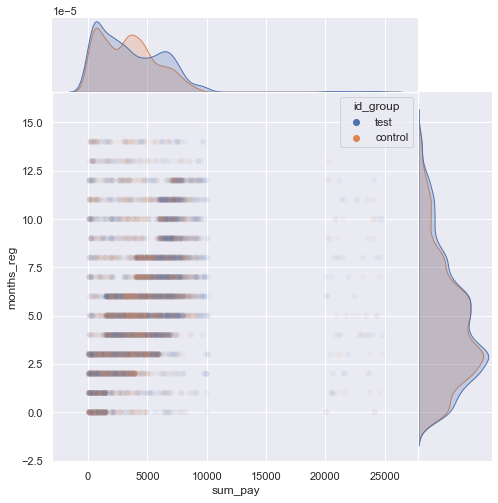

In [5]:
# Оценю данные визуально по тестовой и контрольной выборкам
sns.jointplot(data=dataset, x='sum_pay', y='months_reg', hue='id_group',
              dropna=True, height=7, space=0, alpha=0.05)

# Сохраняю визуализацию в png файл 
plt.savefig('1_dataset_evaluation.png', dpi=300, bbox_inches='tight')

<div class="alert block-alert alert-warning">
    <b>Вывод:</b><br>
Вижу выбросы sum_pay (сумма, на которую была совершена покупка) - в дальнейшем посмотрим более конкретно.<br>
Прослеживается положительная корреляция между sum_pay и months_reg (длительность регистрации клиента в программе лояльности).<br><br>
Суммы покупки в основном небольшие, с относительно пологим пиком в районе 1000<br>
Продолжительность нахождения клиента в программе имеет пологий пик в районе 2.5 месяцев<br>
Оба ряда не подходят под нормальное распределение.
</div>

### Очистка данных от нуллов и выбросов

In [6]:
# очистка датасета от NaN, null значений.
dataset = dataset.dropna()

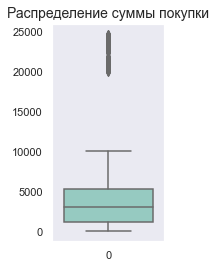

In [7]:
# Смотрю, как распределена сумма покупки

plt.figure(figsize=(2, 4))
plt.title('Распределение суммы покупки', fontsize=14)
plt.grid() # сетка
sns.boxplot(data=dataset['sum_pay'],
            palette='Set3') # устанавливаю пресет оттенков цветов

# Сохраняю визуализацию в png файл 
plt.savefig('2_sum_pay_distribution.png', dpi=300, bbox_inches='tight')

<div class="alert block-alert alert-warning">
Основная часть покупок происходит в районе 1000 - 5000
</div>

***Очищу выбросы, согласно увиденным на boxplot данным***

In [8]:
# очищу выбросы, ограничив sum_pay < 10000
dataset_clear = dataset.loc[dataset['sum_pay'] < 10000]

In [9]:
# Определяем функцию для статистического анализа ряда.

def statistical_analysis (list_or_tuple_input,
                          list_of_quantiles = [0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]):
    """ Расчитывает статистики и производит квантильный анализ.
    
    Parameters
    ----------
    list_or_tuple_input : list, tuple
        Выборка в формате «список» или «кортеж»
    list_of_quantiles : array_like of float, default [0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]
        Квантиль или последовательность квантилей для вычисления,
        которые должны быть между 0 и 1 включительно 
        
    Print
    ------- 
    Среднее, Дисперсия, Стандартное отклонение, Мода, Квантили
    
    Returns
    -------
    pandas.core.frame.DataFrame
        mean_value, variance_value, st_deviation_value, quantile_analysis_array
    """
    
    if type(list_or_tuple_input) not in (list, tuple): # проверяю, что на вход подан список или кортеж
        return 'Нужен список или кортеж!'
    elif len(list_or_tuple_input) <= 4: # проверяю, что количество элементов больше 4
        return 'Требуется более длинный ряд' 
    else:
        series_input = pd.DataFrame(list_or_tuple_input,
                                    columns = ['row_elements']) # меняю тип на pandas Series

# базовая статистика

        # считаю среднее, дисперсию, стандартное отклонение    
        mean_value = series_input['row_elements'].mean()
        variance_value = series_input['row_elements'].var()
        st_deviation_value = series_input['row_elements'].std()

        # считаю моду и медиану
        mode_value = st.mode(series_input['row_elements'])
        median_value = st.median(series_input['row_elements'])
        quantile_analysis_array = np.array(median_value) # начинаю наполнять массив NumPy

        # вывожу на печать параметры
        print("Среднее = ", round(mean_value, 2),'\n'
                "Дисперсия = ", round(variance_value, 2),'\n'
                "Стандартное отклонение = ", round(st_deviation_value, 2),'\n'
                'Мода', mode_value)


# квантильный анализ:

        # считаю квартили
        array_of_quartiles  = np.quantile(series_input['row_elements'],
                                          [0.25, 0.50, 0.75])
        quantile_analysis_array = np.append(quantile_analysis_array,
                                            array_of_quartiles) # наполняю массив


        # считаю межквартильный размах
        interquartile_range = abs(array_of_quartiles[0] - \
                                  array_of_quartiles[2])
        quantile_analysis_array = np.append(quantile_analysis_array,
                                            interquartile_range) # наполняю массив


        # считаю децили
        array_of_deciles = np.quantile(series_input['row_elements'],
                                       list_of_quantiles)
        quantile_analysis_array = np.append(quantile_analysis_array,
                                            array_of_deciles) # наполняю массив


        # формирую список подписей
        list_of_column_names = ['Медиана', '1 квартиль', '2 квартиль',\
                                '3 квартиль', 'Межквартильный размах']
        l2 = list(map(str,list_of_quantiles)) # список децилей
        l3 = ['дециль ' + value_deciles for value_deciles in l2] # добавляю к значениям децилей наименование
        list_of_column_names.extend(list(map(str,l3))) # добавляю новые названия в список подписей


        # перевожу array numpy в dataframe pandas
        quantile_analysis_df = pd.DataFrame(quantile_analysis_array,
                                            index = list_of_column_names )

        
# вывожу гистограмму и датафрейм
        sns.histplot(series_input['row_elements'],
                     stat='frequency',
                     kde=True) # функция построения распределения
        plt.title('Распределение элементов')
        # plt.rcParams["figure.figsize"] = (8, 4)
        plt.vlines(median_value, # отрисую линию медианы
                   ymin = 0, 
                   ymax = series_input['row_elements'].value_counts().mean(), 
                   linestyles= '--', 
                   colors = 'red',
                   label = 'Медиана')
        plt.vlines(np.quantile(series_input['row_elements'], [0.25, 0.75]), # отрисую квартили
                   ymin = 0, 
                   ymax = series_input['row_elements'].value_counts().mean(), 
                   linestyles= '--', 
                   colors = 'orange', 
                   label = 'Q1, Q3 -квартили')
        plt.legend()
        
        # Сохраняю визуализацию в png файл 
        plt.savefig(f'3_{int(mean_value)}_base_statistics.png',
                    dpi=300, bbox_inches='tight')
        
        plt.show()    
    
    
        print (quantile_analysis_df)

        
# возвращаю требуемые значения из функции   
        return (mean_value, variance_value, st_deviation_value,
                quantile_analysis_array)

In [10]:
# преобразую в список, чтобы посмотреть статистики через функцию
sum_pay_clear = dataset_clear['sum_pay'].values.tolist()

***Статистики ряда sum_pay (сумма, на которую была совершена покупка) по очищенной выборке.***

Среднее =  3422.11 
Дисперсия =  5970737.65 
Стандартное отклонение =  2443.51 
Мода 237.0


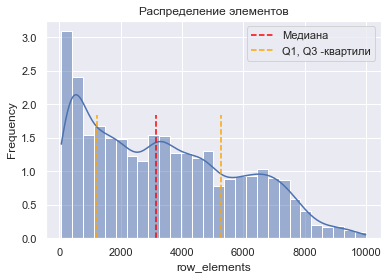

                             0
Медиана                3151.50
1 квартиль             1234.25
2 квартиль             3151.50
3 квартиль             5260.75
Межквартильный размах  4026.50
дециль 0.1              407.50
дециль 0.25            1234.25
дециль 0.3             1573.50
дециль 0.4             2299.00
дециль 0.5             3151.50
дециль 0.6             3891.00
дециль 0.75            5260.75
дециль 0.9             6989.50


(3422.1146473106273,
 5970737.65014002,
 2443.509289963928,
 array([3151.5 , 1234.25, 3151.5 , 5260.75, 4026.5 ,  407.5 , 1234.25,
        1573.5 , 2299.  , 3151.5 , 3891.  , 5260.75, 6989.5 ]))

In [11]:
# Подсчёт статистик
statistical_analysis(sum_pay_clear)

In [12]:
# преобразую в список, чтобы посмотреть статистики через функцию
months_reg_clear = dataset_clear['months_reg'].values.tolist()

***Статистики ряда months_reg (длительность регистрации клиента в программе лояльности) по очищенной выборке.***

Среднее =  4.68 
Дисперсия =  10.03 
Стандартное отклонение =  3.17 
Мода 3


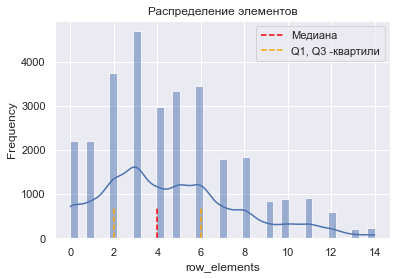

                         0
Медиана                4.0
1 квартиль             2.0
2 квартиль             4.0
3 квартиль             6.0
Межквартильный размах  4.0
дециль 0.1             1.0
дециль 0.25            2.0
дециль 0.3             3.0
дециль 0.4             3.0
дециль 0.5             4.0
дециль 0.6             5.0
дециль 0.75            6.0
дециль 0.9             9.0


(4.68248650660711,
 10.03151642257268,
 3.1672569239915918,
 array([4., 2., 4., 6., 4., 1., 2., 3., 3., 4., 5., 6., 9.]))

In [13]:
# Подсчёт статистик
statistical_analysis(months_reg_clear)

### Сравнения выборок в A и B группе

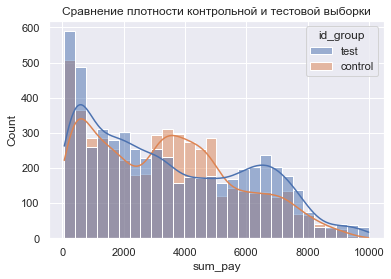

In [14]:
# Гистограмма распределения контрольной и тестовой выборки

sns.histplot(dataset_clear, x='sum_pay', hue='id_group', kde=True)
plt.title('Сравнение плотности контрольной и тестовой выборки')
# plt.show()

# Сохраняю визуализацию в png файл 
plt.savefig('4_distribution_ABtest.png', dpi=300, bbox_inches='tight')

### Результаты параметрического и непараметрического тестов

#### Проверка нулевой гипотезы о равенстве распределений двух выборок.

In [15]:
# Функция непараметрического теста

def mann_whitney_func (a, b, alfa=0.05):
    """Проводит анализ на равенство распределений.
    
    Parameters
    ----------
    a, b: array_like
        Массивы сравниваемых выборок.
    alfa: float
        Уровень значимости. 
        
    Returns
    -------
    r_mannwhitney: float
        Значение статистики Манна — Уитни.
    pvalue_mannwhitney: float
        Значение p_value нулевой гипотезы.
    """
    #Calculation Mann-Whitney correlation.
    r_mannwhitney, pvalue_mannwhitney = stats.mannwhitneyu(a, b,
                    alternative = 'two-sided',
                    nan_policy = 'omit') # NaN будут опущены при вычислении.
    
    
    if pvalue_mannwhitney > alfa:
        print('Нулевая гипотеза о равенстве распределений принимается')
    else:
        print('Нулевая гипотеза о равенстве распределений отвергается')
          
        
    #Returning from function   
    return r_mannwhitney, pvalue_mannwhitney

In [16]:
# выборка по контролькой группе
dataset_clear_A = dataset_clear.loc[dataset_clear['id_group'] == 'control']

In [17]:
# выборка по тестовой группе
dataset_clear_B = dataset_clear.loc[dataset_clear['id_group'] == 'test']

In [18]:
# Определение равенства распределений для выборок.

U1, p = mann_whitney_func(dataset_clear_A['sum_pay'],
                          dataset_clear_B['sum_pay'])
print('\nU-критерий Манна - Уитни =', U1,
      '\np-value =', p)

Нулевая гипотеза о равенстве распределений принимается

U-критерий Манна - Уитни = 14141330.5 
p-value = 0.09764037292812035


p-value - показывает силу нулевой гипотезы

#### Проверка нулевой гипотезы о равенстве средних двух выборок

In [19]:
# Функция параметрического теста

def two_sample_ttest (a, b, alfa=0.05):
    """Рассчитывает T-статистику для средних значений двух независимых выборок.
    
    Parameters
    ----------
    a, b: array_like
        Массивы сравниваемых выборок.
    alfa: float
        Значение статистического критерия. 
        
    Returns
    -------
    statistic: float or array
        Вычисленная t-статистика.
    pvalue: float or array
        Вычисленная p-value.
    alfa: float
        Значение статистического критерия из условия.
    """
    #Calculate the T-test for the means of two independent samples of scores.
    s,p = ttest_ind(a, b)

    #Printing of conclusions
    if p > alfa:
        print('Нулевая гипотеза о равенстве средних принимается')
    else:
        print('Нулевая гипотеза о равенстве средних отвергается\
            \nв пользу гипотезы, что они не равны\n')
        
    #Returning required values from functions   
    return print(f' s= {s}, p={p}, alfa={alfa}')

In [20]:
# T-статистика для средних значений двух независимых выборок

two_sample_ttest(dataset_clear_A['sum_pay'],
                 dataset_clear_B['sum_pay'])

Нулевая гипотеза о равенстве средних отвергается            
в пользу гипотезы, что они не равны

 s= -3.356159831664094, p=0.0007930687003032978, alfa=0.05


p-value - вероятность того, что разница между двумя выборками случайна

<div class="alert block-alert alert-warning">
    <b>Вывод:</b><br>
Непараметрический метод - распределения контрольной и тестовой выборки равны.<br>
Параметрический метод - математические ожидания генеральных совокупностей из которых сделаны выборки не равны.<br>
    
Непараметрические методы наиболее приемлемы, когда объем выборок мал. Если данных много (например, n>100), а у нас 8603 - то не имеет смысла использовать непараметрические статистики. Когда выборки становятся очень большими, то выборочные средние подчиняются нормальному закону, даже если исходная переменная не является нормальной или измерена с погрешностью. Таким образом, параметрические методы, являющиеся более чувствительными (имеют большую статистическую мощность), практически всегда подходят для больших выборок.
</div>

## Анализ по торговым точкам

### Визуализация результатов в A и B группе по каждой торговой точке

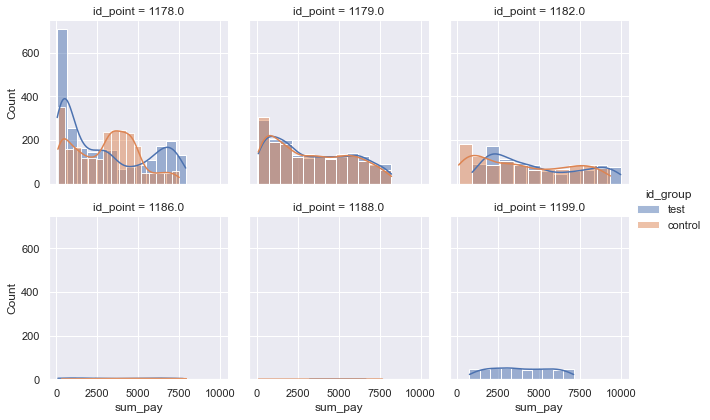

In [21]:
# Распределения контрольной и тестовой выборки по точкам продаж

grid = sns.FacetGrid(dataset_clear, col='id_point',
                     hue='id_group', col_wrap=3)
grid.map(sns.histplot, 'sum_pay', kde = True)
grid.add_legend()

# Сохраняю визуализацию в png файл 
plt.savefig('5_distribution_ABtest_id_point.png', dpi=300, bbox_inches='tight')

### Результаты параметрического и непараметрического тестов по каждой торговой точке


-------------------

Точка продаж 1186            
кол-во строк в A-тесте: 23
кол-во строк в B-тесте: 40            

Вывод непараметрического теста:
Нулевая гипотеза о равенстве распределений принимается

U-критерий Манна - Уитни = 553.0 
p-value = 0.18665794088873022 

Вывод параметрического теста:
Нулевая гипотеза о равенстве средних принимается
 s= 1.3502123367588006, p=0.181936501831722, alfa=0.05


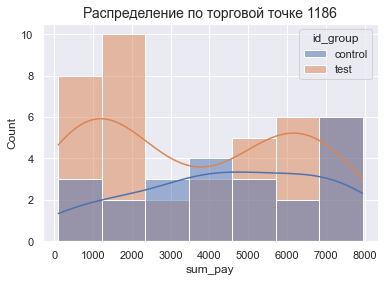


-------------------

Точка продаж 1188            
кол-во строк в A-тесте: 5
кол-во строк в B-тесте: 4            

Вывод непараметрического теста:
Нулевая гипотеза о равенстве распределений принимается

U-критерий Манна - Уитни = 12.0 
p-value = 0.7301587301587302 

Вывод параметрического теста:
Нулевая гипотеза о равенстве средних принимается
 s= 0.13596158621984006, p=0.8956790614998074, alfa=0.05


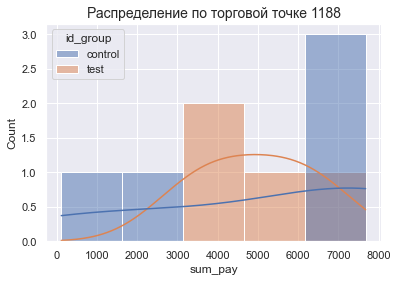


-------------------

Точка продаж 1199            
кол-во строк в A-тесте: 0
кол-во строк в B-тесте: 476            

Вывод непараметрического теста:
недостаточно данных


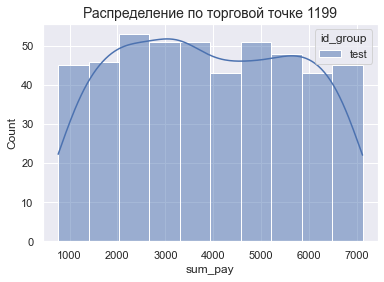


-------------------

Точка продаж 1178            
кол-во строк в A-тесте: 2403
кол-во строк в B-тесте: 2406            

Вывод непараметрического теста:
Нулевая гипотеза о равенстве распределений отвергается

U-критерий Манна - Уитни = 3122337.5 
p-value = 1.5133330174771163e-06 

Вывод параметрического теста:
Нулевая гипотеза о равенстве средних принимается
 s= 1.5338932633911708, p=0.1251217226713009, alfa=0.05


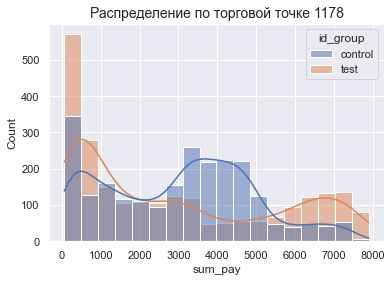


-------------------

Точка продаж 1179            
кол-во строк в A-тесте: 1697
кол-во строк в B-тесте: 1745            

Вывод непараметрического теста:
Нулевая гипотеза о равенстве распределений принимается

U-критерий Манна - Уитни = 1447666.5 
p-value = 0.2580763851815786 

Вывод параметрического теста:
Нулевая гипотеза о равенстве средних принимается
 s= -1.1225576641441302, p=0.2617037465196552, alfa=0.05


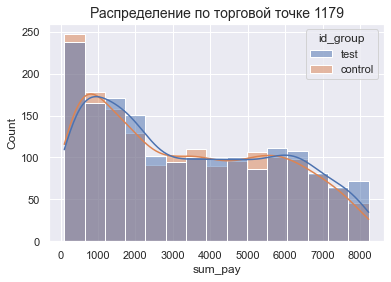


-------------------

Точка продаж 1182            
кол-во строк в A-тесте: 1012
кол-во строк в B-тесте: 935            

Вывод непараметрического теста:
Нулевая гипотеза о равенстве распределений отвергается

U-критерий Манна - Уитни = 382818.5 
p-value = 3.21069245696521e-13 

Вывод параметрического теста:
Нулевая гипотеза о равенстве средних отвергается            
в пользу гипотезы, что они не равны

 s= -6.557556680839402, p=6.988545437582617e-11, alfa=0.05


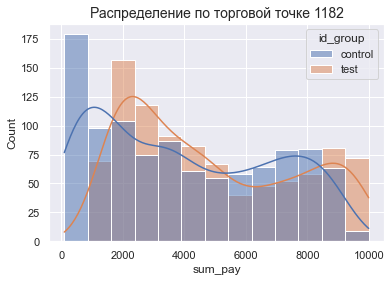

In [22]:
for i in set(dataset_clear['id_point']):
    
    point_dataset_A = dataset_clear_A.loc[dataset_clear['id_point'] == i]
    point_dataset_B = dataset_clear_B.loc[dataset_clear['id_point'] == i]
    point_dataset = dataset_clear.loc[dataset_clear['id_point'] == i]
    
    len_A = len(point_dataset_A)
    len_B = len(point_dataset_B)
    
    print(f'\n-------------------\n\nТочка продаж {int(i)}\
            \nкол-во строк в A-тесте: {len_A}')
    print(f'кол-во строк в B-тесте: {len_B}\
            \n\nВывод непараметрического теста:')
    
    
    if len_A < 4 or len_B < 4:
        print('недостаточно данных')
    else:
        # Определение равенства распределений для выборок.
        U1, p = mann_whitney_func(point_dataset_A['sum_pay'],
                                  point_dataset_B['sum_pay'])
        print(f'\nU-критерий Манна - Уитни = {U1} \np-value = {p} \n')
    
        # T-статистика для средних значений двух независимых выборок
        print('Вывод параметрического теста:')
        two_sample_ttest(point_dataset_A['sum_pay'],
                         point_dataset_B['sum_pay'])
        
    # Гистограмма распределения контрольной и тестовой выборки
    sns.histplot(point_dataset, x='sum_pay', hue='id_group', kde=True)
    plt.title(f'Распределение по торговой точке {int(i)}', fontsize=14)
    
    # Сохраняю визуализацию в png файл 
    plt.savefig(f'6_distribution_id_point_{int(i)}.png', dpi=300,
                bbox_inches='tight')
    
    plt.show()

<div class="alert block-alert alert-warning">
    <b>Вывод:</b><br>
Только в точке продаж 1182 нулевая гипотеза о равенстве математических ожиданий отвергается в пользу гипотезы, что они не равны. Параметрическую гипотезу применяем, т.к. количество данных большое. И всё это означает, что для точки продаж 1182 мы получили статистически значимый результат об отличии результатов тестовой и контрольной выборок. По остальным торговым точкам статистически значимых отличий между выборками нет<br><br>
В целом эффективность воздействия рекламной акции в группе B по сравнению с воздействием в группе A не наблюдается. За исключением точки продаж 1182. Нужно уточнить параметры проведения AB-теста.
</div>

## Исследование распределения клиентов по сегментам

In [23]:
# Функция построения bar chart сегментации

def plot_segments_distribution(df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['sum_pay']\
                            .count().reset_index()
        sns.catplot(x = segment, 
                    y = 'sum_pay',
                    hue = test_factor, # разные группы будут иметь разный цвет
                    data = aggregated_data, 
                    kind = 'bar')      # строю солбчатую диаграмму

***Посмотрю распределение по сегментам:***
- `months_reg` - длительность регистрации клиента в программе лояльности
- `id_point` - id торговой точки

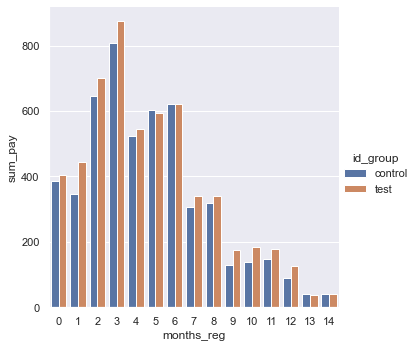

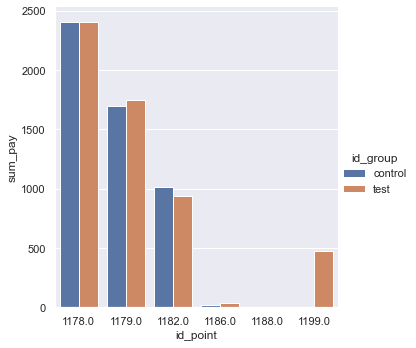

In [24]:
# смотрю графики распределения

plot_segments_distribution(dataset_clear,  #датафрейм
                           ['months_reg', 'id_point',], #сегменты
                           'id_group') #тест-фактор

# Сохраняю визуализацию в png файл 
plt.savefig('7_segment_distribution.png', dpi=300, bbox_inches='tight')

<div class="alert block-alert alert-warning">
    <b>Вывод:</b><br>
Сегментирование months_reg (длительность регистрации клиента в программе лояльности) и по id_point (торговая точка) = 1178, 1179, 1182 - приемлимые,<br>  
Для id_point = 1186, 1188, 1199 - требуют пересмотра
</div>

## Корреляция между выплаченной суммой и длительностью регистрации

***Визуально оценю общую (для обоих тестов) корреляцию sum_pay и months_reg***

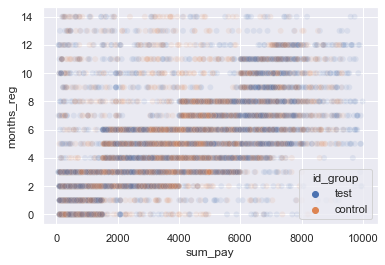

In [25]:
sns.scatterplot(data=dataset_clear, x='sum_pay', y='months_reg',
                hue='id_group', alpha = 0.1)

# Сохраняю визуализацию в png файл 
plt.savefig('8_overall_correlation .png', dpi=300, bbox_inches='tight')

***Корреляционный анализ***

In [26]:
# Функция для проведения корреляционного анализа

def proxi_ranges (a, b, alfa=0.05):
    """Проводит корреляционный анализ и печатает результаты.
    
    Parameters
    ----------
    a, b: array_like
        Массивы сравниваемых выборок.
    alfa: float
        Уровень значимости. 
    """
    #Calculation of covariance and variances of samples.
    covariance = np.cov(a, b, rowvar = False)
    
    #Calculation Pearson correlation.
    linear_correlation, pvalue_pearson = stats.pearsonr(a, b)
    
    #Calculation Spearman correlation.
    spearman_correlation, pvalue_spearman = stats.spearmanr(a, b)

    #Printing of result calculations
    print('Дисперсия ряда A =', round(covariance[0,0], 2),
          '\nДисперсия ряда B =', round(covariance[1,1], 2),
          '\nКовариация рядов = ', round(covariance[0,1], 2),
          '\nКоэффициент корреляции Пирсона =',
                round(linear_correlation, 3), '; p-value =', pvalue_pearson,
          '\nКоэффициент ранговой корреляции Спирмена =',
                round(spearman_correlation, 3), '; p-value =', pvalue_spearman)
    
    
    if (pvalue_pearson or pvalue_spearman) > alfa:
        print('Корреляция = 0')
    elif (abs(linear_correlation) or abs(spearman_correlation)) < 0.3:
        print('Корреляция слабая')
    elif 0.3 <= (abs(linear_correlation) or abs(spearman_correlation)) <= 0.7:
        print('Корреляция средняя')
    else:
        print('Корреляция сильная')
          
        
    #Returning from function   
    return

In [27]:
# Определение дисперсий и корреляций для выборок.
proxi_ranges(dataset_clear['sum_pay'], dataset_clear['months_reg'])

Дисперсия ряда A = 5970737.65 
Дисперсия ряда B = 10.03 
Ковариация рядов =  4645.67 
Коэффициент корреляции Пирсона = 0.6 ; p-value = 0.0 
Коэффициент ранговой корреляции Спирмена = 0.653 ; p-value = 0.0
Корреляция средняя


***Посмотрю отдельно на корреляцию sum_pay и months_reg по каждой точке продаж***

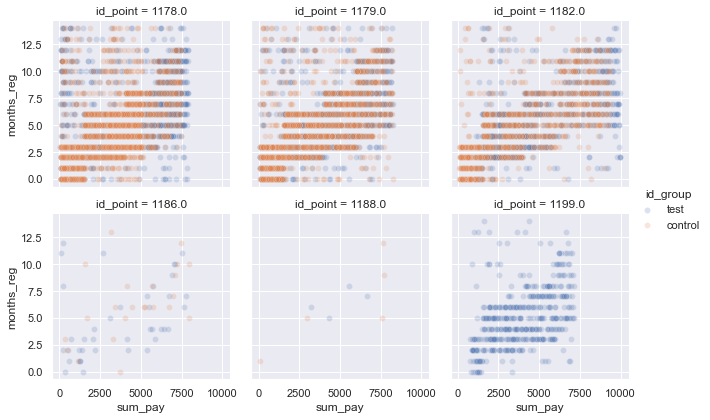

In [28]:
# Распределения контрольной и тестовой выборки по точкам продаж

grid = sns.FacetGrid(dataset_clear, col='id_point', hue='id_group', col_wrap=3)
grid.map(sns.scatterplot, 'sum_pay', 'months_reg', alpha = 0.2)
grid.add_legend()

# Сохраняю распределение как png файл 
plt.savefig('9_distribution_point_group.png', dpi=300, bbox_inches='tight')

<div class="alert block-alert alert-warning">
    <b>Вывод:</b><br>
На графиках по точкам продаж 1178, 1179, 1182 наблюдается примерно-линейная положительная зависимость для контрольных выборок, одновременно с отсуствием видимой зависимости по тестовым выборкам. <br>

Для точек продаж 1186, 1188, 1199 требуется накопление дополнительных данных. Сейчас на них пологаться не будем.
</div>

***Оценю корреляцию sum_pay и months_reg только для контрольных выборок по точкам продаж 1178, 1179, 1182 - они у нас с самыми "чистыми" данными.***

In [29]:
# Определение дисперсий и корреляций для выборок.
points_sum_pay = dataset_clear_B['sum_pay'].\
    loc[dataset_clear_B.id_point.isin((1178, 1179, 1182))]
points_months_reg = dataset_clear_B['months_reg'].\
    loc[dataset_clear_B.id_point.isin((1178, 1179, 1182))]

proxi_ranges(points_sum_pay, points_months_reg)

Дисперсия ряда A = 6915173.27 
Дисперсия ряда B = 10.59 
Ковариация рядов =  5368.18 
Коэффициент корреляции Пирсона = 0.627 ; p-value = 0.0 
Коэффициент ранговой корреляции Спирмена = 0.674 ; p-value = 0.0
Корреляция средняя


<div class="alert block-alert alert-info">
</div>

## Бизнес-рекомендации

1. В целом, эффективности воздействия рекламной акции в контрольной группе по сравнению с воздействием в тестовой не наблюдается. За исключением точки продаж 1182. 

>***Вывод:***  
Нужно уточнить параметры проведения AB-теста.  
Или это показывает, что рекламная акция не дала результата.
    
2. Сегментирование по:
    - months_reg (длительность регистрации клиента в программе лояльности) - приемлимое
    - id_point (торговая точка) = 1178, 1179, 1182 - приемлимое
    - для id_point = 1186, 1188, 1199 - требуют пересмотра


3. По точкам продаж 1178, 1179, 1182 наблюдается линейная положительная зависимость для контрольных выборок, одновременно с отсуствием видимой зависимости по тестовым выборкам. 


4. Для точек продаж 1186, 1188, 1199 требуется накопление дополнительных данных.